In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [23]:
torch.manual_seed(32)
model = Model()

In [24]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [25]:
df = pd.read_csv('/content/iris.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


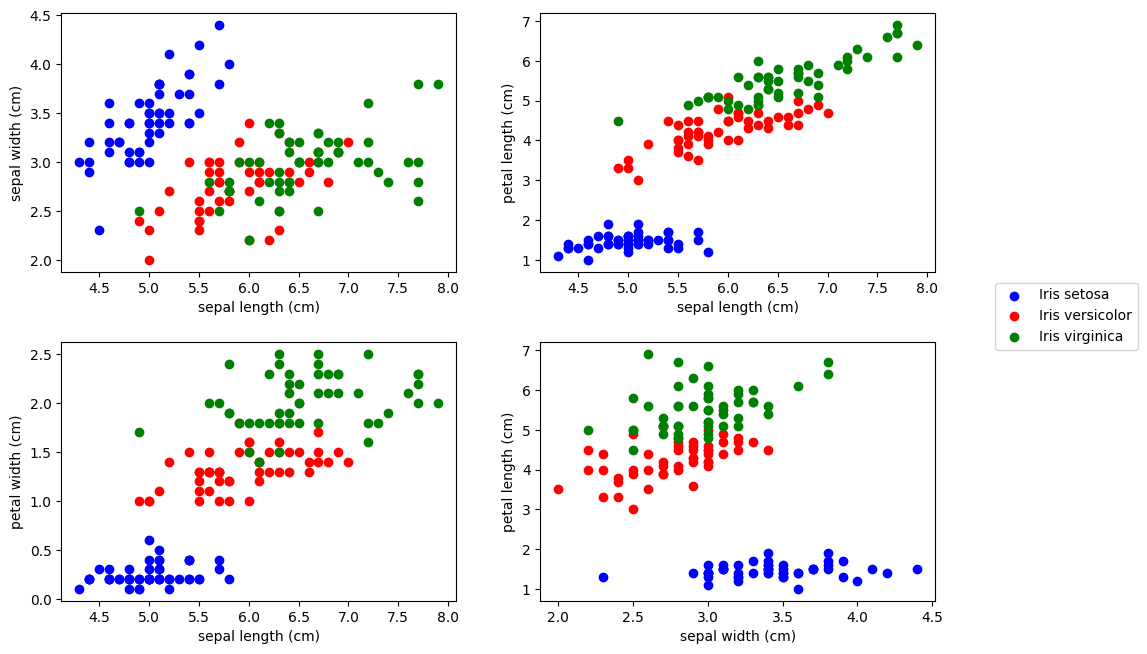

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.tight_layout(pad=3.0)

# Feature index pairs for plots
plots = [(0, 1), (0, 2), (0, 3), (1, 2)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

# Create scatter plots
for i, ax in enumerate(axes.flat):
    x_idx, y_idx = plots[i]
    x_label = iris.feature_names[x_idx]
    y_label = iris.feature_names[y_idx]
    for j in range(3):
        ax.scatter(
            df[df['target'] == j][x_label],
            df[df['target'] == j][y_label],
            color=colors[j],
            label=labels[j] if i == 0 else ""  # Only add labels once
        )
    ax.set(xlabel=x_label, ylabel=y_label)

# Add one legend for all plots
fig.legend(labels=labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


In [30]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [31]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [32]:
torch.manual_seed(4)
model = Model()

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.09575200
epoch: 11  loss: 0.98176485
epoch: 21  loss: 0.75609583
epoch: 31  loss: 0.49419561
epoch: 41  loss: 0.34950069
epoch: 51  loss: 0.22784515
epoch: 61  loss: 0.13530220
epoch: 71  loss: 0.09152257
epoch: 81  loss: 0.07372882
epoch: 91  loss: 0.06543060


In [35]:
detached_losses = [loss.detach().numpy() for loss in losses]

SaileshKumar
212222230126



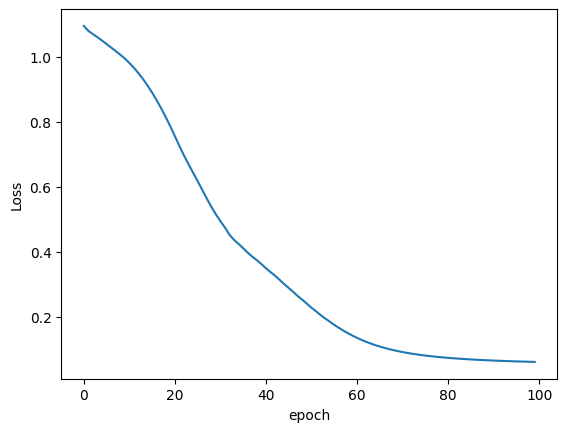

In [47]:
plt.plot(range(len(detached_losses)), detached_losses)
print("SaileshKumar\n212222230126\n")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()


In [38]:
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06236213


In [39]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-0.3405,  7.3566,  1.3707])     1
 2. tensor([0.2747, 8.1488, 0.4138])        1
 3. tensor([ 11.9818,   6.1788, -19.1899])  0
 4. tensor([-2.0216,  7.9597,  4.2339])     1
 5. tensor([-6.1397,  7.9443, 11.0864])     2
 6. tensor([-10.2711,   8.3000,  18.0008])  2
 7. tensor([ 12.0381,   6.4263, -19.2827])  0
 8. tensor([ 12.9323,   6.4755, -20.7418])  0
 9. tensor([-5.7778,  8.2352, 10.5033])     2
10. tensor([-7.8917,  8.6034, 14.0677])     2
11. tensor([-8.7110,  8.5980, 15.4298])     2
12. tensor([ 11.6191,   5.8112, -18.6104])  0
13. tensor([-8.1081,  8.2234, 14.3879])     2
14. tensor([-2.0836,  7.7684,  4.3107])     1
15. tensor([-6.0867,  8.3830, 11.0509])     2
16. tensor([0.1330, 7.8598, 0.6288])        1
17. tensor([-4.0930,  7.7140,  7.6592])     2
18. tensor([ 13.1338,   6.5848, -21.0678])  0
19. tensor([-1.5695,  8.0146,  3.4673])     1
20. tensor([-6.2900,  8.9642, 11.4163])     2
21. tensor([ 12.3687,   6.2517, -19.8166])  0
22. tensor([ 13.8037,   7.0790, -2

In [40]:
torch.save(model.state_dict(), 'IrisModel.pt')

In [41]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [42]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06236213


In [43]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

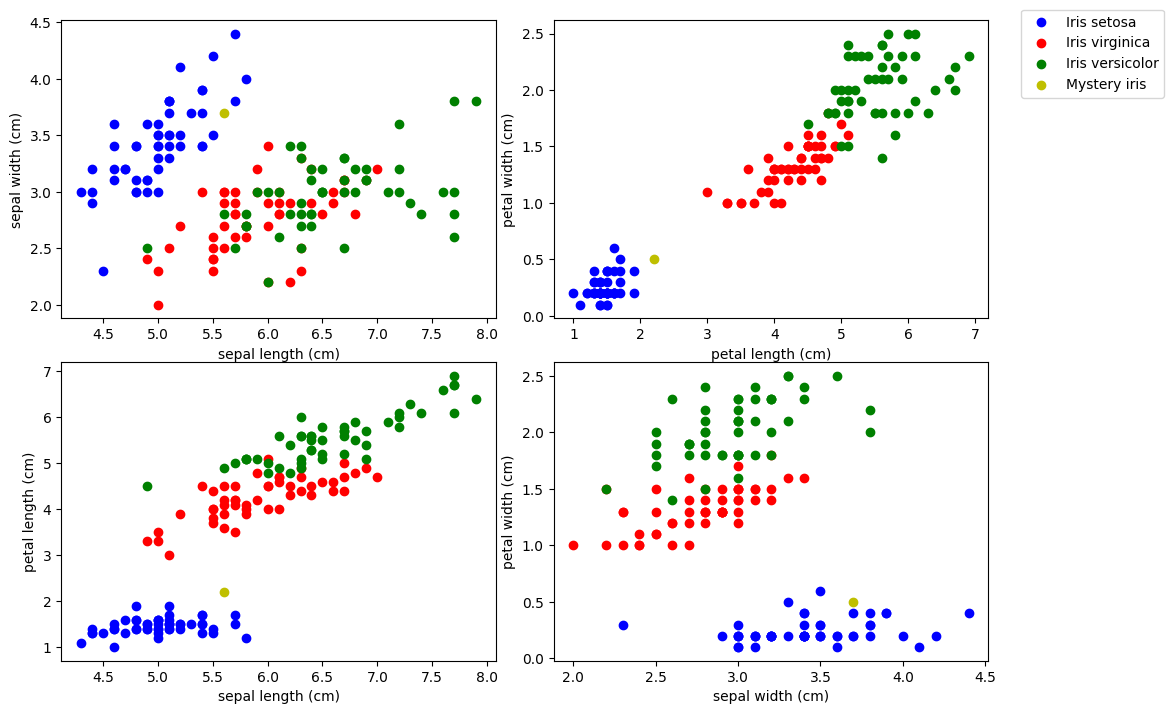

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [45]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([ 12.1977,   7.1240, -19.5229])

Iris setosa
